<a href="https://colab.research.google.com/github/anaelisabraz/LetsCode/blob/main/Projeto_A_Wine_Quality_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

#Instruções

- O projeto deverá ser entregue até dia 25/01 antes do início da aula
- O projeto poderá ser feito em grupo com até 5 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook

# Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

![image.png](attachment:image.png)

# Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics


# Etapa 1.1 - Análise exploratória de dados

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Entendimento dos outliers, caso necessário (sempre explicando a opção)

Os dados utilizados na análise estavam inicialmente divididos em duas bases, sendo uma referente à vinho tinto e outra referente à vinho branco. 
Foi tomada a decisão de criar uma nova base de dados, resultante da união das duas bases originais e com a adição de uma coluna binária chamada *type*, onde a variável assume valor 0 quando o vinho é do tipo *red* e 1 quando o vinho é do tipo *white*.  

## **Carregamento da base de dados**

In [ ]:
red_df = pd.read_csv("https://bstinfo.com.br/winequality-red.csv", sep=';')
white_df = pd.read_csv("https://bstinfo.com.br/winequality-white.csv", sep=';')
red_df['type'] = 0
white_df['type'] = 1
wine_df = pd.concat([red_df, white_df], ignore_index=True)

In [ ]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [ ]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


Avaliando os datasets, é possível concluir que não há dados faltantes.

##**Head da base de dados**



A base é composta por 13 features, a saber: 

+ *fixed acidity*: A Acidez Fixa é a soma dos ácidos fixos do vinho. Por princípio, quanto mais elevada for a acidez fixa, mais baixa é a volátil. 

+ *volatile acidity*: A Acidez Volátil é a soma dos ácidos voláteis, que se liber­tam por ebulição ou destilação do vinho e traduz o nível de ataque aceto bacteriano ao vinho. Por lei não pode ultrapassar o valor de 1,2 gr. de ácido acético por litro.

+ *citric acid*: Ácido constitutivo dos vinhos que fornece acidez fresca. Por vezes pode ser atacado pelas bactérias da fermentação malolática.

+ *residual sugar*: É o açúcar natural da uva. A levedura se alimenta dele e o converte em álcool etílico e dióxido de carbono. Assim, é a quantidade de açúcar no mosto que vai determinar o nível de álcool de um vinho e também o açúcar residual – ou seja, o que não foi completamente consumido pelas leveduras após a fermentação.

+ *chlorides*:  Nos vinhos, a concentração de ions cloreto é geralmente indicativa da presença de cloreto de sódio.
O cloreto de sódio aumenta a salinidade de um vinho, o que pode contribuir ou diminuir a qualidade e o qualidade do sabor do vinho. A concentração de
o cloreto varia muito de um vinho para outro, mas raramente excede 500 mg/L. 

+ *free sulfur dioxide*: O dióxido de enxofre livre é responsável pela proteção
dos vinhos, impedindo futuras oxidações no mosto, e principalmente
no vinho acabado.
 
+ *total sulfur dioxide*: A proporção Livre/Combinado forma o chamado $SO^2$ Total, e todo este conjunto depende de diversos fatores, tais como, teor de açúcares, nível de acetaldeído, pH e temperatura.

+ *density*: A densidade do vinho está relacionada principalmente ao
seu teor alcoólico e de açúcares residuais.

+ *pH*: O pH afeta o aspecto visual, o aroma, o paladar, assim como a longevidade de um vinho. 

+ *sulphates*: Sulfatos são compostos à base de enxofre que são usados na indústria cosmética e, também, em produtos de limpeza. Alguns compostos de sulfato, porém, têm uso também no processo de vinificação, incluindo, por exemplo, sulfato de amônio.

+ *alcohol*: O teor alcoólico expressa a porcentagem de álcool em um líquido. 

+ *quality*: Escala de 0 a 10, onde 0 significa que o vinho tem uma qualidade muito ruim e 10 significa que o vinho é excelente. Será a variável dependente no estudo.

+ *type*: Assume valor 0 quando o vinho é do tipo red e 1 quando o vinho é do tipo white.

In [ ]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## **Análise exploratória e descritiva dos dados**

Definição de funções responsáveis por plotar gráficos para auxiliar na análise explorátoria dos dados.

In [ ]:
def exploratory_analysis(data: pd.Series, kde: bool = False) -> None:
  f, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex=True,
                                    figsize=(18,4),
                                    gridspec_kw={"height_ratios": (.2, .8)})
                                    

  mean = data.mean()
  median = data.median()
  mode = data.mode()
  q1 = data.quantile(.25)
  q3 = data.quantile(.75)

  sns.boxplot(x = data, ax=ax_box)
  sns.histplot(data, ax=ax_hist, kde=kde)
  ax_hist.axvline(x=mean, color="red", label=f"Média - {mean:.2f}")
  ax_hist.axvline(median, color="green", label=f"Mediana - {median:.2f}")

  ax_box.set_xlabel('')
  ax_hist.set_xlabel(data.name.capitalize())

  for i in range(mode.shape[0]):
      ax_hist.axvline(mode[i], color="yellow", label=f"Moda - {mode[0]:.2f}")

  ax_hist.axvline(q1, color="orange", label=f"Q1 - {q1:.2f}")
  ax_hist.axvline(q3, color="pink", label=f"Q3 - {q3:.2f}")

  ax_hist.legend()

In [ ]:
palette ={0: "#991c20", 1: "#feffc2"}
labels ={"Branco", "Tinto"}

def print_histograms(df):
    for i in df.columns[:-2]:
        plt.figure(figsize = (10,5))
        sns.histplot(x=df[i], hue=df[df.columns[-1]], hue_order=[0, 1], palette = palette, alpha = 1)
        plt.legend(labels=labels)

        
def print_boxplots(df):
    for i in df.columns[:-2]:
        plt.figure(figsize = (10,5))
        sns.boxplot(y=df[i], x=df['quality'], hue=df[df.columns[-1]], palette = palette)
        plt.legend(labels=labels)

**Gráfico de colunas - Variável Quality**



[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Quality')]

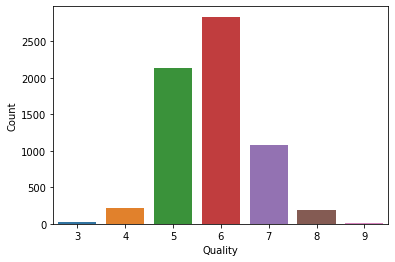

In [ ]:
df = wine_df['quality'].value_counts()
barplot = sns.barplot(x=df.index, y=df, )
barplot.set(xlabel = 'Quality', ylabel = 'Count')

Apesar da vaiável *quality* admitir valores inteiros entre 0 e 10, observa-se que os dados variam entre 3 e 9. A distribuição dos dados aparenta ser simétrica, com moda = 6 e poucos dados nas extremidades.

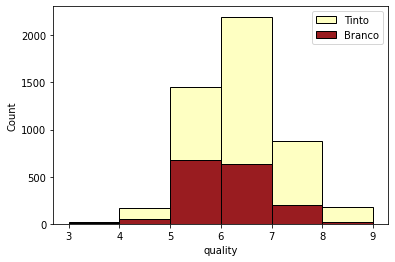

In [ ]:
sns.histplot (x = 'quality',
            hue = 'type',
            hue_order=[0, 1],
            data = wine_df,
            palette = palette,
            binwidth = 1,
            alpha = 1)

plt.legend(labels=labels)
plt.show()

O histograma da variável *quality* pelo tipo de vinho evidencia uma certa semelhança na distribuição dos dados para ambos os tipos no que se refere à simetria. A moda da qualidade para o vinho tinto é 5 e para o vinho branco é 6. Além disso, percebe-se uma maior quantidade de dados para o vinho branco do que para o vinho tinto.

In [ ]:
wine_df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Inicialmente, foram verificadas as saídas possíveis para a variável dependente *quality*. Conforme já foi citado na análise do gráfico de colunas, apesar do range da qualidade dos vinhos ser de 0 a 10, o dataset não inclui vinhos muito ruins (qualidade de 0 a 2) ou excelentes (qualidade 10).

No dataset, é possível observar que a variável se distribui em torno da média, com a maior parte dos registros sendo de qualidade mediana (notas 5 a 7).

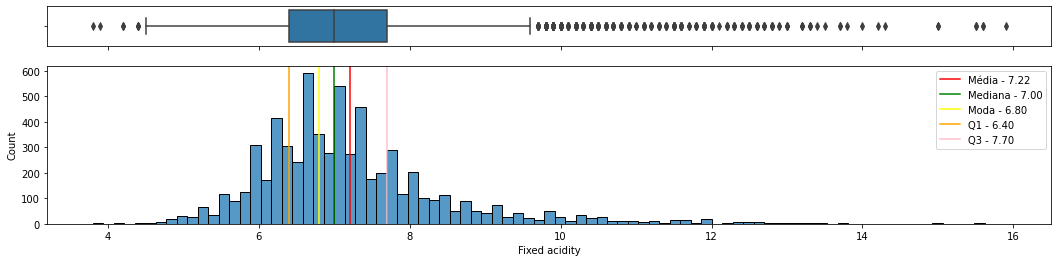

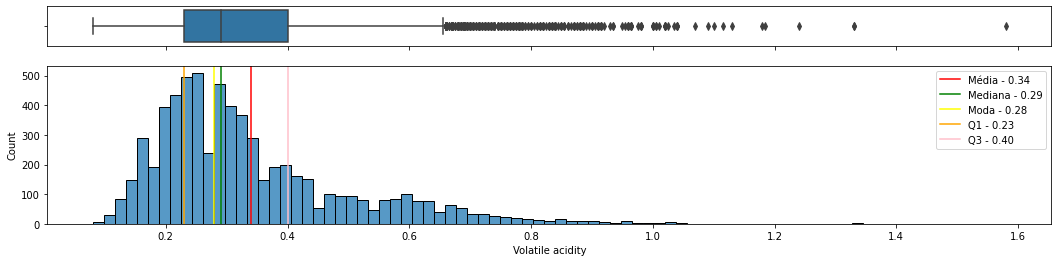

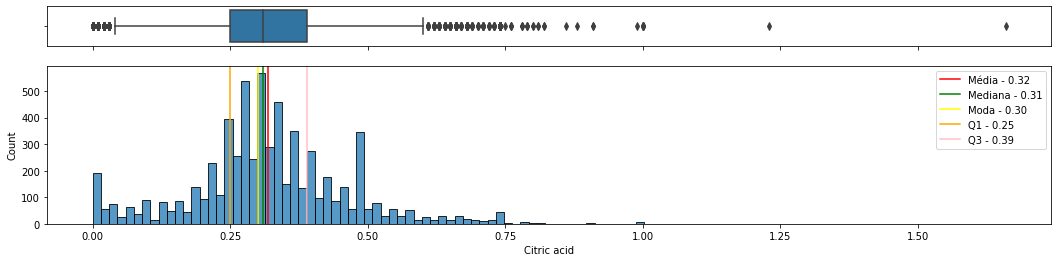

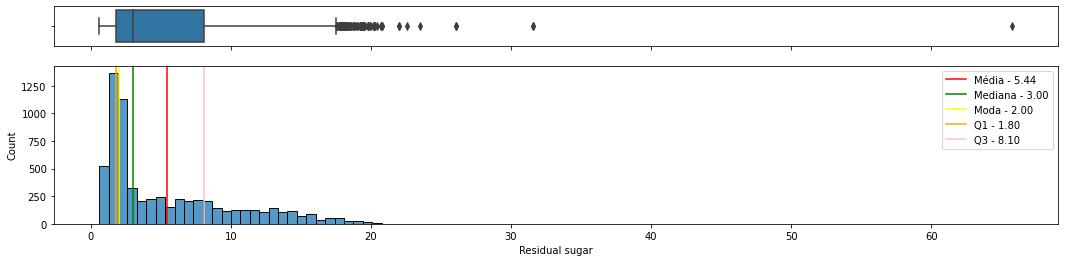

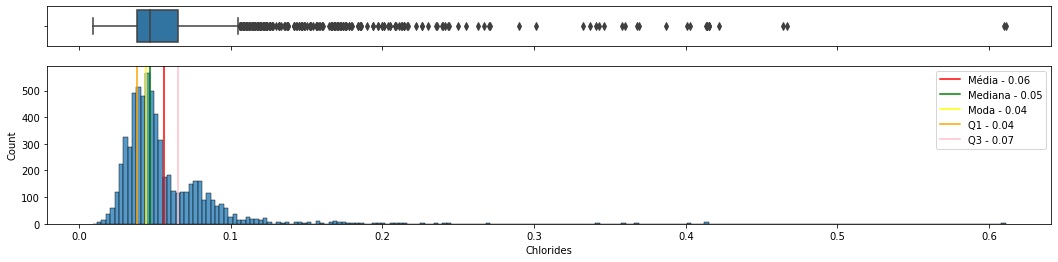

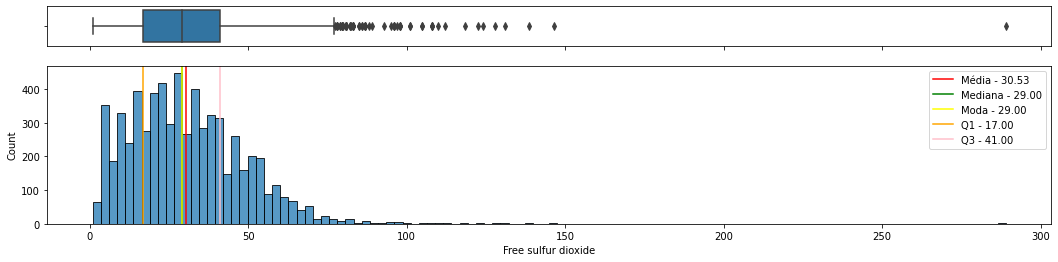

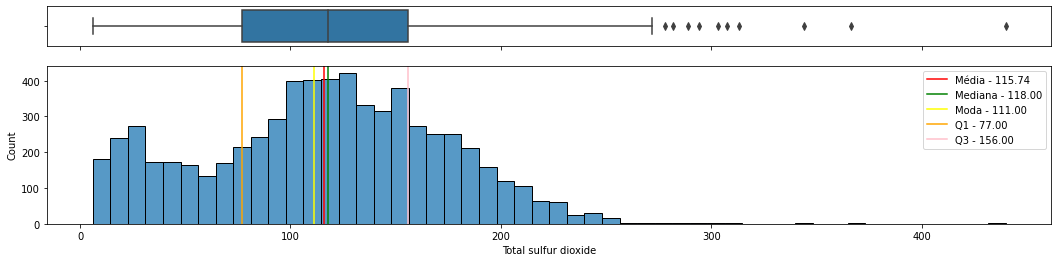

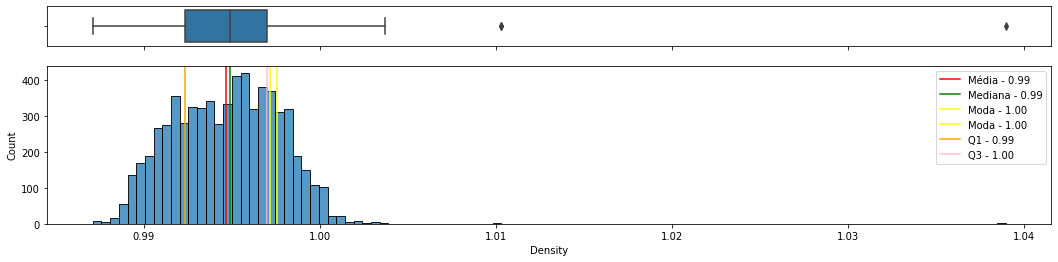

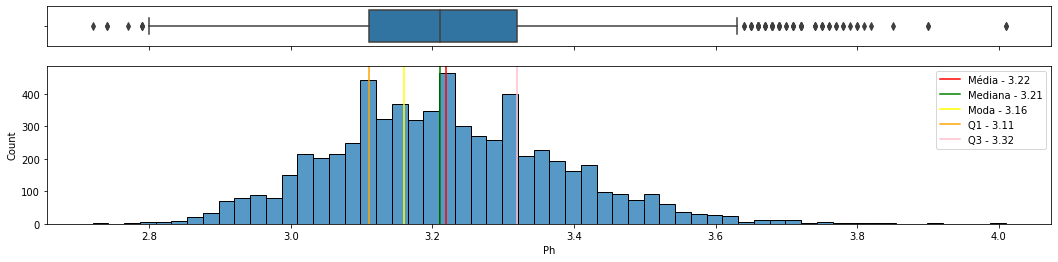

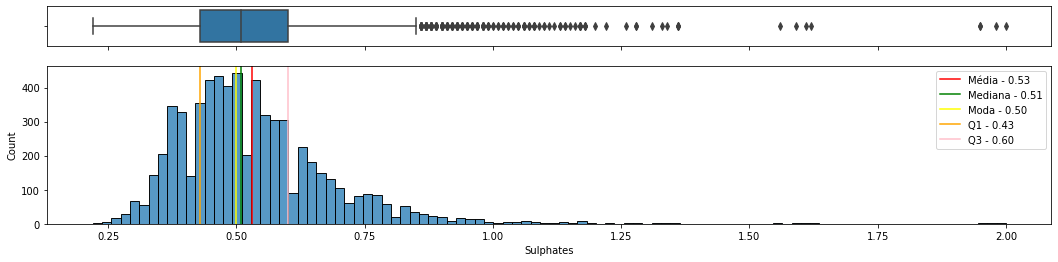

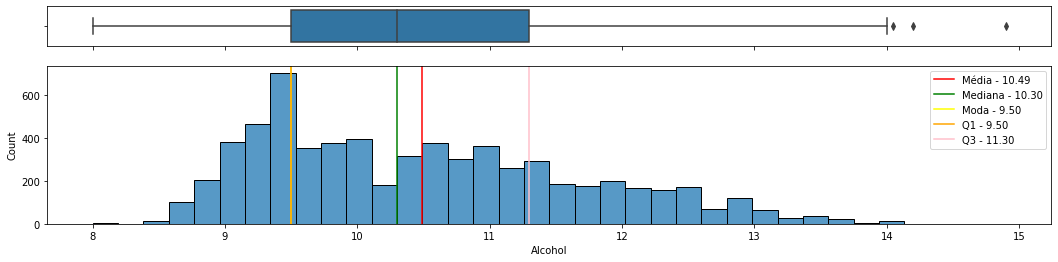

In [ ]:
for variable in wine_df.columns[:-2]:
  exploratory_analysis(wine_df[variable])

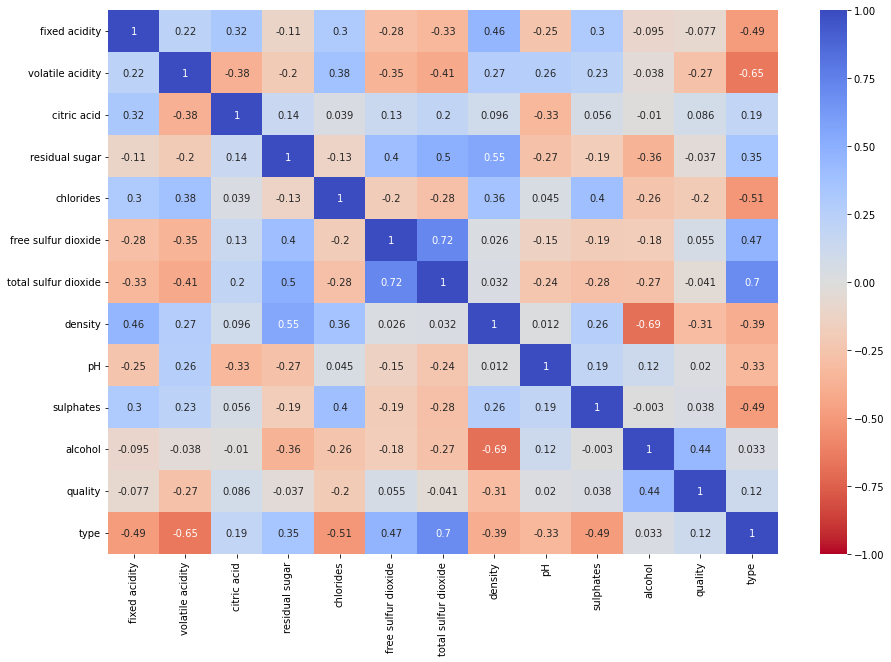

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(wine_df.corr(), cmap="coolwarm_r", annot = True, vmin=-1, vmax=1)

Através do Heatmap podemos observar que o álcool é a variável independente mais influente na qualidade do vinho. Esse fato pode ser explicitado pela correlação entre as duas variáveis, de 0.44. Como a correlação é positiva, entende-se que conforme o teor alcóolico (%) aumenta, a qualidade  também aumenta.

A acidez volátil possui a correlação de -0.27 com a qualidade, isso é, conforme a acidez volátil aumenta a qualidade diminui, o que faz todo sentido dado que ninguém gostaria de experimentar um vinho muito ácido.

Apesar da correlação ser relativamente baixa, ao olhar os boxplots da acidez volátil pela qualidade e por tipo de vinho observa-se que para o vinho tinto há uma variação maior na acidez volátil para os vinhos com qualidade mais baixa e essa variação diminui conforme a qualidade desse tipo de vinho aumenta. Já para os vinhos do tipo branco, os valores parecem estáveis. 

Como a base de dados possui mais vinhos brancos do que vinhos tintos, pode ser que os vinhos branco estejam influenciando no valor da correlação, enfraquecendo-a.

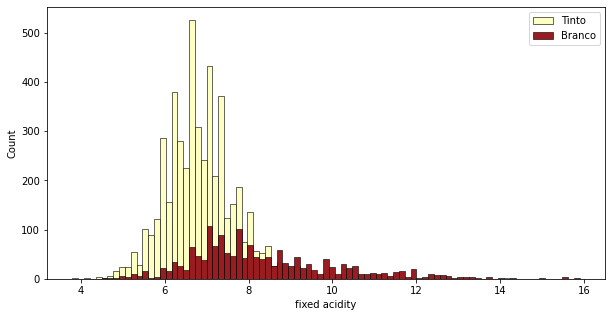

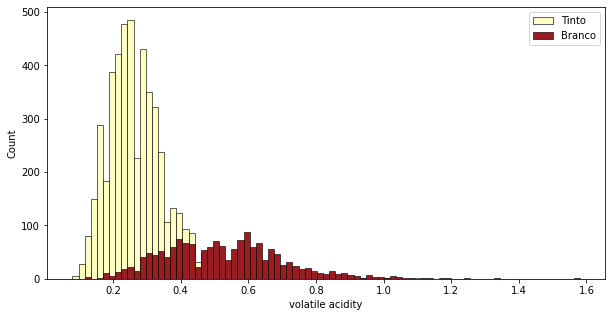

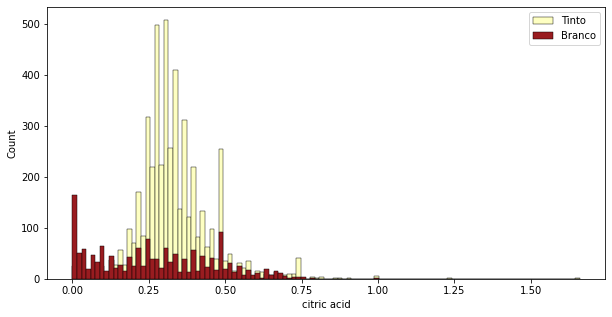

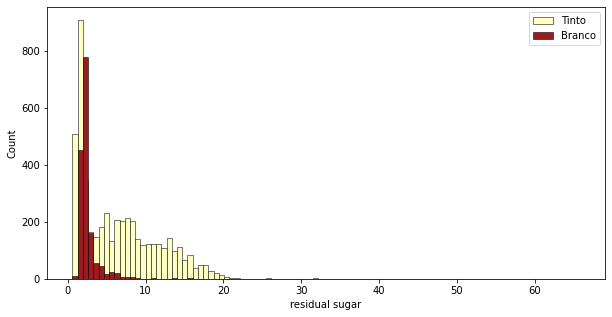

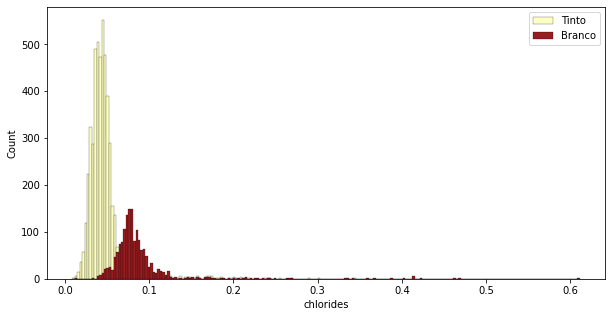

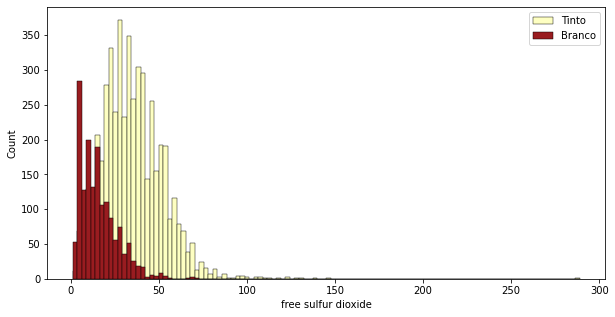

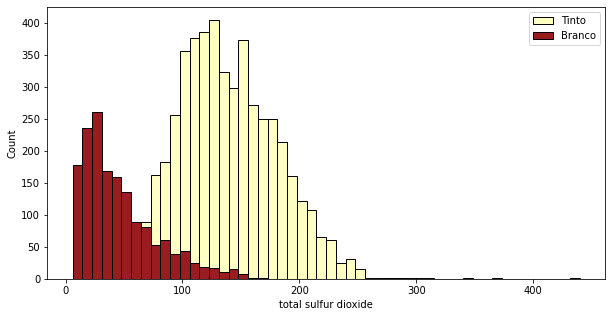

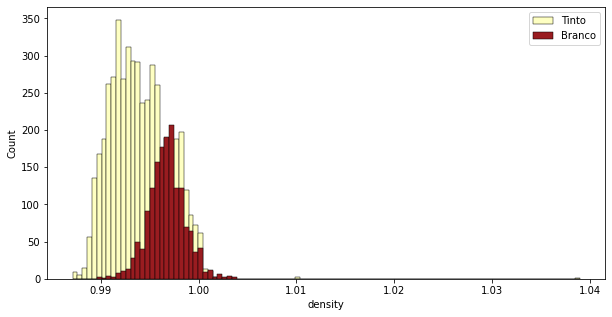

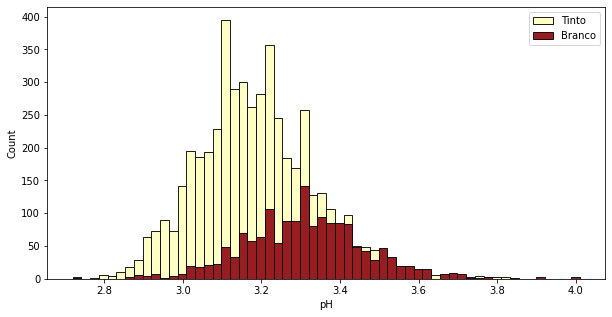

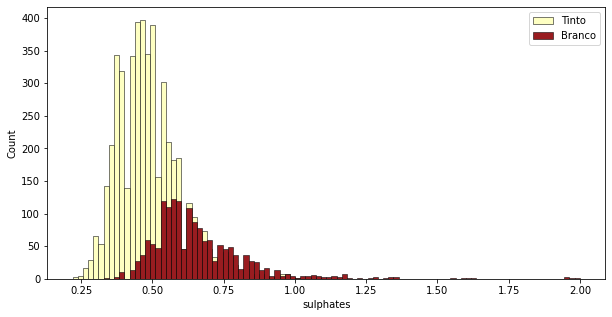

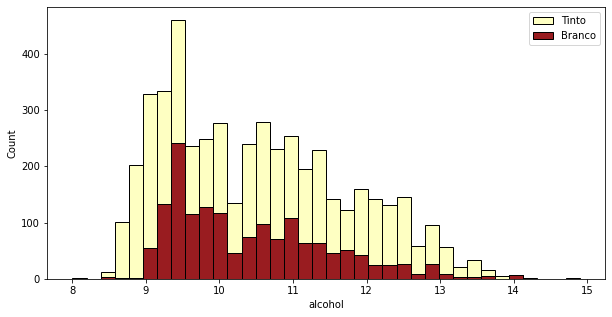

In [ ]:
print_histograms(wine_df)

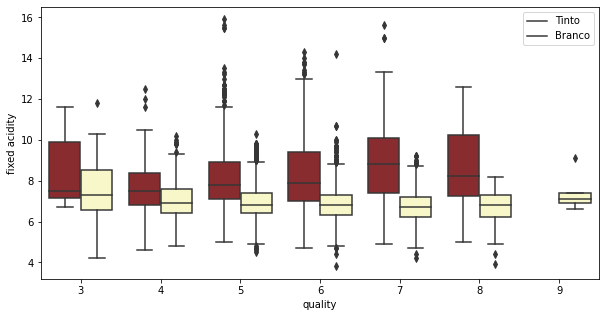

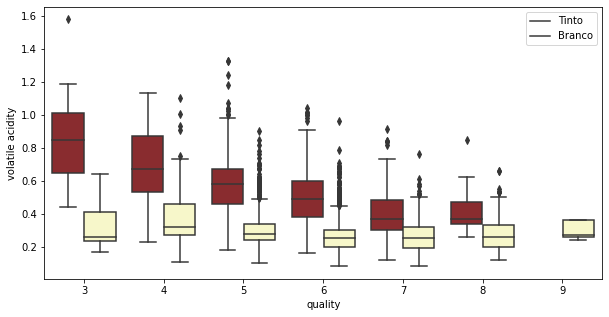

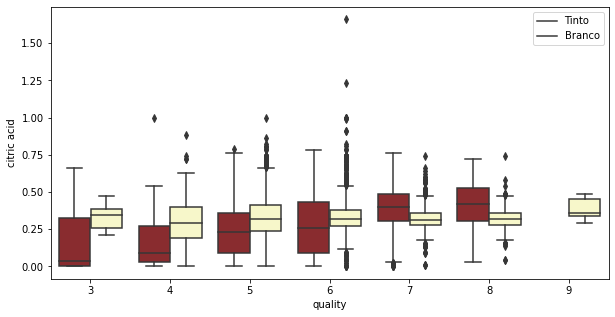

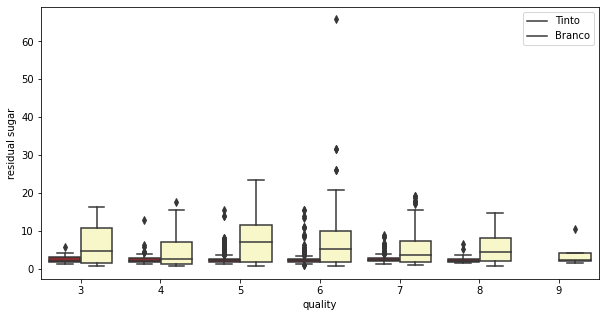

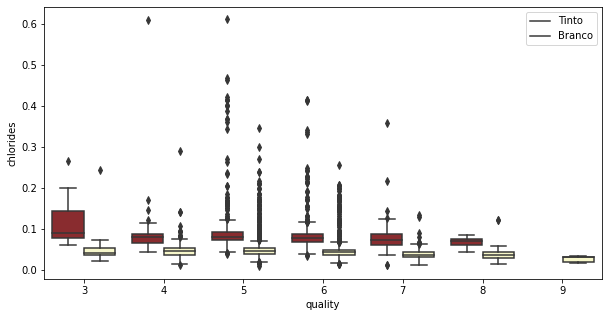

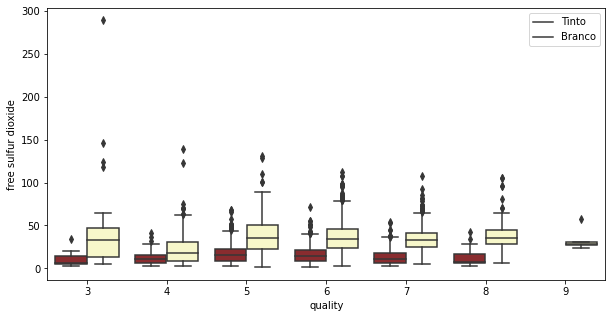

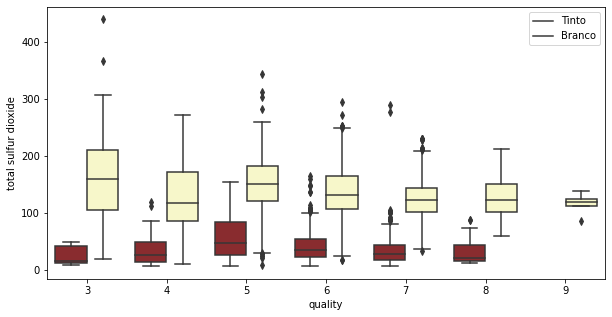

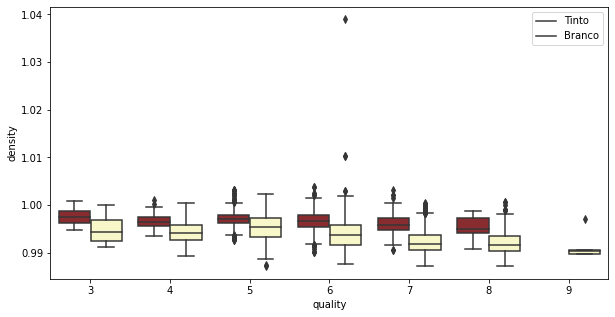

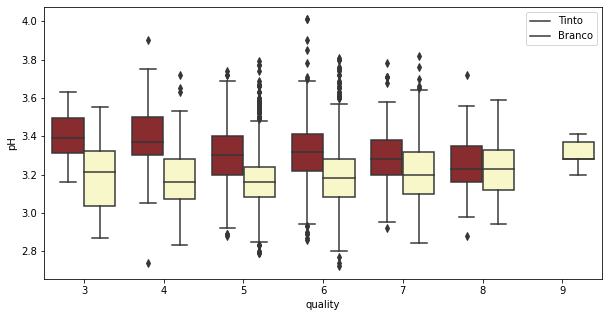

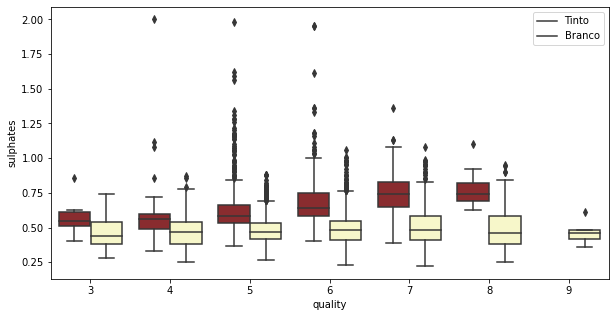

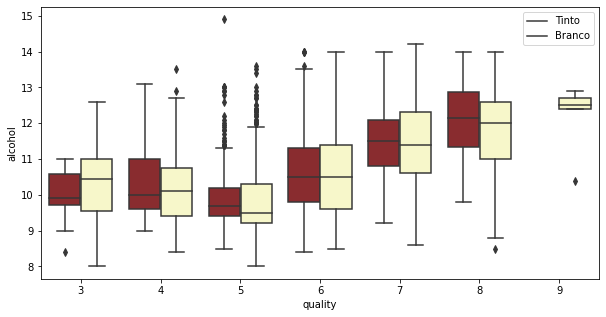

In [ ]:
print_boxplots(wine_df)

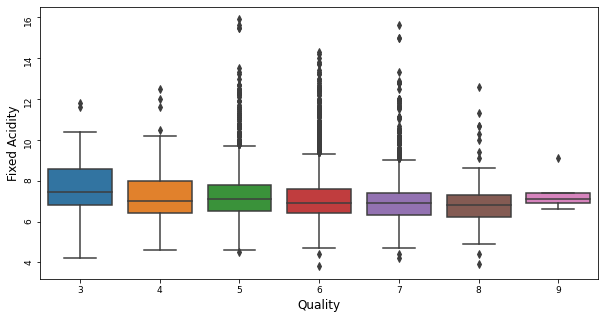

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='fixed acidity',x='quality',data=wine_df)
plt.yticks(rotation =90,fontsize=9)
plt.xticks(fontsize=9)
plt.title("",fontsize=15)
plt.xlabel('Quality',fontsize=12)
plt.ylabel('Fixed Acidity',fontsize=12)
plt.show()

Apesar da observação de valores extremos a partir do critério da distância interquartil, por não haver conhecimento técnico suficiente para avaliarmos a existência de erros na coleta de dados, optou-se por manter todas as observações sem nenhum tipo de tratamento.

# Etapa 1.2 - Preparação dos dados e Separação em treino e teste

## **Separando a variável dependente das variáveis regressoras**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
X = wine_df[features]
y = wine_df['quality']

print(len(X), len(y))

6497 6497


In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## **Dividindo a base de dados em treino e teste**

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=wine_df['type'], random_state = 0)
index_train = X_train.index
index_test = X_test.index

## **Padronizando as features**

A padronização das features é um passo importante a ser realizado quando as grandezas das features são diferentes entre si (ou quando a os valores admitidos por elas são diferentes entre si). Ao padronizar as features, é como se todas elas fossem colocadas "na mesma unidade de medida". 

In [ ]:
features_std = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

sc_X = ColumnTransformer([
        ('name', StandardScaler(), features_std)
    ], remainder='passthrough')

X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=features, index=index_train)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=features, index=index_test)

#Etapa 2 - Modelo de Regressão Linear

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

## **Ajuste do modelo linear completo**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 
y = y_train

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:59:14   Log-Likelihood:                -5071.3
No. Observations:                4547   AIC:                         1.017e+04
Df Residuals:                    4534   BIC:                         1.025e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0999 

Ao observar o p-valor de cada $\beta_i$ associado a cada uma das variáveis regressoras, verifica-se que o menos significativa para o ajuste é o do $\beta$ associado à variável *chlorides*, por possuir o p-valor maior que o nível de significância $\alpha=0,01$. 

Portanto, essa variável será retirada do modelo e será feita outro ajuste. Cabe 
ressaltar que esse procedimento será repetido até que se chegue ao modelo parcimonioso, onde todos os $\beta_i$ contidos no ajuste serão considerados significativos.  

## **Ajuste do modelo linear retirando a variável chlorides**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     167.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:59:14   Log-Likelihood:                -5072.1
No. Observations:                4547   AIC:                         1.017e+04
Df Residuals:                    4535   BIC:                         1.025e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0922 

Verifica-se que o menos significativa para o ajuste é o do  $\beta$ associado à variável *citric acid*, por possuir o p-valor maior que o nível de significância  $\alpha=0,01$.

Portanto, essa variável será retirada do modelo e será feita outro ajuste.

## **Ajuste do modelo retirando a variável citric acid**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     184.2
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:59:14   Log-Likelihood:                -5073.7
No. Observations:                4547   AIC:                         1.017e+04
Df Residuals:                    4536   BIC:                         1.024e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0980 

Todos os $\beta$ contidos no ajuste são significativos para o modelo, pois o p-valor de todos eles é menor que o nível de significância $\alpha=0,01$.

Entretanto, é necessário verificar a hipótese de multicolinearidade para de fato ter o ajuste do modelo parcimonioso. 

Para verificar as variáveis que possuem colinearidade, optou-se por fazer um *heatmap* somente das features contidas no último modelo ajustado, verificar quais delas possuem maior correlação, ajustar novos modelos retirando alternadamente as variáveis mais correlacionadas e comparar os modelos. 

Para comparar os modelos, será utilizado o Critério de Akaike (AIC).

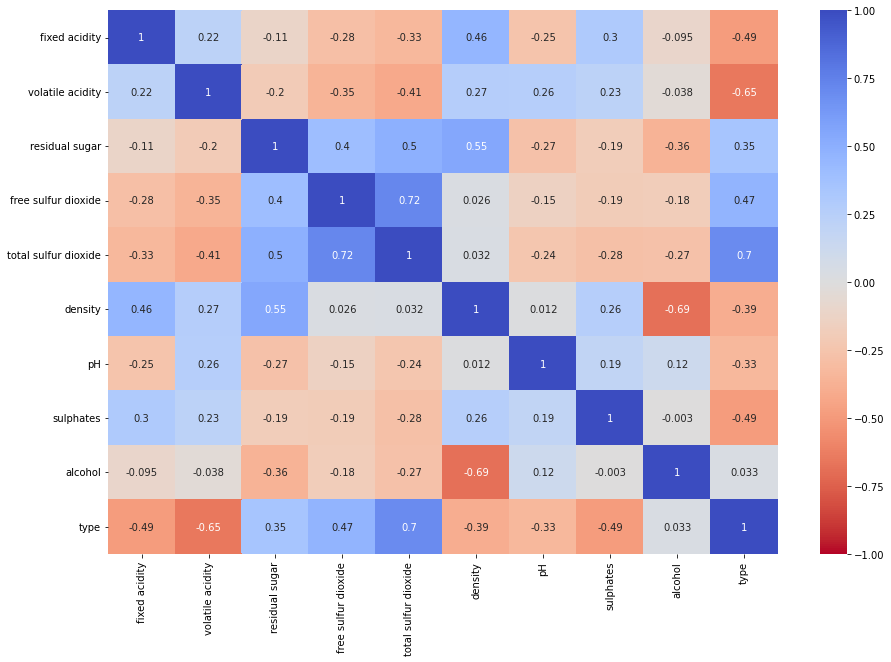

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(wine_df[features].corr(), cmap="coolwarm_r", annot = True, vmin=-1, vmax=1)

As variáveis com a correlação mais forte são:

+ *free sulfur dioxide* e *total sulfur dioxide*, com correlação de 0,72

+ *alcohol* e *density*, com correlação de -0,69

## **Modelo sem a variável free sulfur dioxide**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          9.88e-324
Time:                        22:59:15   Log-Likelihood:                -5083.0
No. Observations:                4547   AIC:                         1.019e+04
Df Residuals:                    4537   BIC:                         1.025e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1484 

## **Modelo sem a variável total sulfur dioxide**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:59:15   Log-Likelihood:                -5079.2
No. Observations:                4547   AIC:                         1.018e+04
Df Residuals:                    4537   BIC:                         1.024e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1937    

O AIC do primeiro modelo é 10.190 e o do segundo modelo é 10.180, ou seja, não há diferenças estatisticamente significativas que apontem que um modelo é melhor que o outro. O mesmo acontece para o $R^2$ ajustado. 

Portanto, optou-se arbitrariamente permanecer com o primeiro modelo, retirando a variável *free sulfur dioxide*.

O modelo sem a variável *free sulfur dioxide* apresentou também o resultado de não significância do $\beta$ associado à variável *total sulfur dioxide*. Dado o exposto, essa variável também será retirada.

## **Modelo sem as variáveis free sulfur dioxide e total sulfur dioxide**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     226.9
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:59:15   Log-Likelihood:                -5083.4
No. Observations:                4547   AIC:                         1.018e+04
Df Residuals:                    4538   BIC:                         1.024e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.1738      0.046  

Para esse modelo, todos os $\beta$ foram considerados significativos. 

Será apresentado novamente o *heatmap* das variáveis constantes no modelo para evidenciar as variáveis de maior correlação e seguir com a análise de colinearidade. 

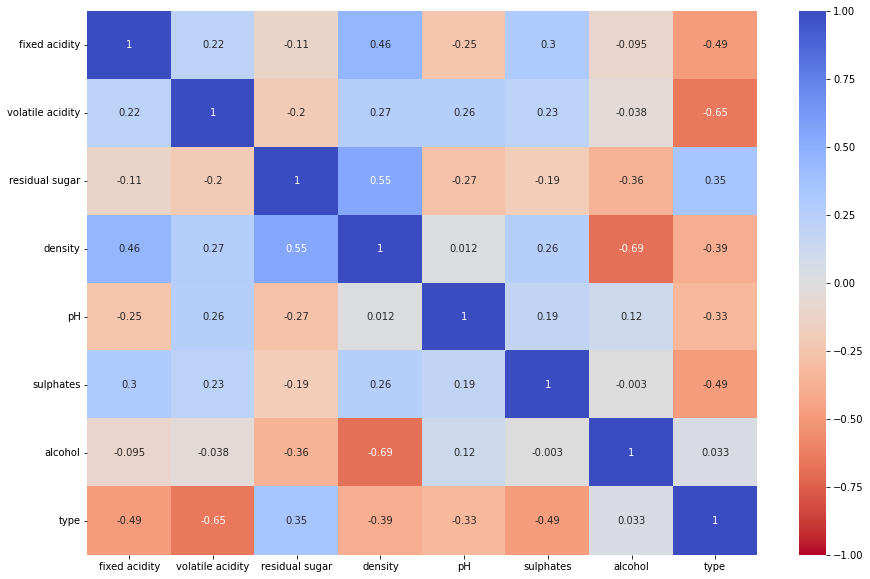

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(wine_df[features].corr(), cmap="coolwarm_r", annot = True, vmin=-1, vmax=1)

Conforme citado anteriormente, as variáveis com segunda maior correlação são *density* e *alcohol*, com correlação de -0,69. 

Serão ajustados modelos retirando uma delas e deixando a outra com fins de obtenção de um modelo parcimonioso. 

## **Modelo sem a variável density**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     249.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          2.02e-315
Time:                        22:59:16   Log-Likelihood:                -5107.7
No. Observations:                4547   AIC:                         1.023e+04
Df Residuals:                    4539   BIC:                         1.028e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9808      0.037  

## **Modelo sem a variável alcohol**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'sulphates', 'density', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     245.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          4.90e-311
Time:                        22:59:16   Log-Likelihood:                -5117.8
No. Observations:                4547   AIC:                         1.025e+04
Df Residuals:                    4539   BIC:                         1.030e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3709      0.040  

Os modelos apresentaram AIC e $R^2$ ajustado muito similares. Entretanto, com a variável *alcohol* é a que apresenta maior correlação com a variável dependente, optou-se por mantê-la no modelo. 

Portanto, será utilizado o modelo sem a variável *density*. Deste, será retirada a variável *pH*, por apresentar um p-valor bem alto. 

## **Modelo sem as variáveis density e pH**

In [ ]:
#retirando pH -> maior p valor 
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol', 'type']

X = X_train[features] 

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
y_pred = est.predict(sm.add_constant(X_test[features]))
print(est.summary())
print(metrics.mean_squared_error(y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     291.4
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          1.29e-316
Time:                        22:59:16   Log-Likelihood:                -5107.8
No. Observations:                4547   AIC:                         1.023e+04
Df Residuals:                    4540   BIC:                         1.027e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9870      0.035  

Todas os $\beta$ contidos no modelo são estatisticamente significativos, o que implica que, a princípio, o modelo com as variáveis *fixed acidity, volatile acidity, residual sugar, sulphates, alcohol e type* é o modelo parcimonioso. 

Entretanto, ainda é necessário avaliar se os pressupostos de um modelo linear estão sendo violados. 

Além disso, cabe ressaltar que mesmo que os pressupostos não sejam violados, o modelo possui $R^2$ ajustado de 0.277, o que significa que o modelo só consegue explicar 27,7% da variabilidade dos dados, isto é, é um modelo com pouca capacidade preditiva. 

Note que independente da retirada de variáveis, o $R^2$ ajustado dos modelos anteriores já era baixíssimo. Isso já é um indicativo de que a classe dos modelos lineares não é adequada para modelar esses dados e que provavelmente haverá violação na hipótese de homoscedasticidade dos dados.

## **Diagnóstico e validação do modelo**

In [ ]:
#features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol', 'type']

X_test_new = X_test[features] 
X_test_new = sm.add_constant(X_test_new)
y_pred = est.predict(X_test_new)

In [ ]:
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

**Histograma dos Resíduos**

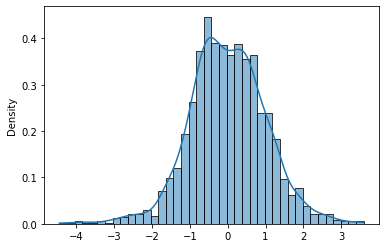

In [ ]:
sns.histplot(std_residuals, kde = True, stat = "density")

O histograma dos resíduos evidencia uma distribuição com comportamento aparentemente simétrico, mas com mais dados na cauda à esquerda, inclusive saindo do intervalo de variação esperado para a analise do pressuposto de normalidade, isto é, entre [-3;3]. 

**Q-Q plot**

((array([-3.38538153, -3.13384527, -2.99429846, ...,  2.99429846,
          3.13384527,  3.38538153]),
  array([-4.447015  , -4.14558771, -3.94076144, ...,  3.37366145,
          3.54573819,  3.59219811])),
 (0.9969943844418742, 1.743771366052397e-16, 0.9957112477850175))

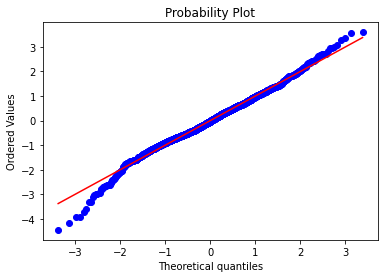

In [ ]:
fig,ax = plt.subplots()
probplot(std_residuals, plot = ax, fit=True)

No *Q-Q plot*, a reta vermelha representa os quantis teóricos da N(0,1) e os pontos azuis representam os quantis amostrais dos resíduos. 

Esse gráfico é utilizado para verificar se há ou não a violação da hipótese de normalidade dos resíduos e espera-se que os pontos azuis se ajustem bem à reta vermelha.

Nesse gráfico, verifica-se que a cauda à esquerda se afasta um pouco mais do que o esperado. Entretanto, isso pode ser reflexo da pouca quantidade de dados. 

Pelo fato do restante dos resíduos estar dentro do padrão esperado, será assumida a normalidade dos resíduos. 


**Valores ajustados X Resíduos - análise de homoscedasticidade**

Text(0, 0.5, 'Resíduos')

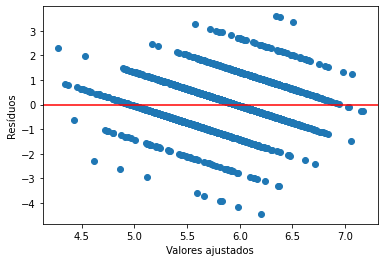

In [ ]:
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')

Para que a validação da hipótese de homoscedasticidade, espera-se um comportamento aleatório dos resíduos no gráfico *Valores ajustados X Resíduos*. Isso significa que a maior parte da variabilidade dos dados foi captada pelo modelo.

Conforme já era esperado, a hipótese de homoscedasticidade foi violada, uma vez que o gráfico apresenta uma tendência decrescente conforme os valores ajustados aumentam.   


##**Métricas**

In [ ]:
MSE = metrics.mean_squared_error(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
R2 = metrics.r2_score(y_test,y_pred)
print('MSE: ', MSE)
print('MAE: ', MAE)
print('R2 ', R2)

MSE:  0.531070376791555
MAE:  0.5698315382353779
R2  0.2928914982025004


## **Conclusão**

O modelo de regressão linear não é adequado para modelar esses dados, pois houve violação do pressuposto de homoscedasticidade.

Entretanto, calculamos as métricas de avaliação do modelo e também podemos concluir que, supondo que o modelo fosse adequado, ele teria baixa capacidade de predição.

Isso se dá, sobretudo, por não ser a classe de modelo adequada para modelar a qualidade dos vinhos, uma vez que a variável resposta é inteira, finita e enumerável, sendo bastante diferente do suporta da distribuição Normal.

A classe de modelos lineares generalizados possui modelos mais adequados para modelar esse tipo de variável, a saber:

+ **Modelo logistico binomial:** agrupando a variável *quality* em duas categorias.

+ **Modelo logistico multinomial:** utilizando os valores da variável *quality* como categorias.

# Etapa 3 - Regressão logística

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### **Função para criação das matrizes de confusão**

In [ ]:
def make_confusion_matrix(cf,
                          group_names=['True Neg','False Pos','False Neg','True Pos'],
                          categories=['ruim','bom'],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
y_train = y_train.apply(lambda v: 0 if v < 6 else 1)
y_test = y_test.apply(lambda v: 0 if v < 6 else 1)

##**Modelo completo**

Optimization terminated successfully.
         Current function value: 0.518836
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4534
Method:                           MLE   Df Model:                           12
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2155
Time:                        23:11:00   Log-Likelihood:                -2359.1
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                4.029e-270
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3574      0.187      7.246      0.000       0.990       1.725

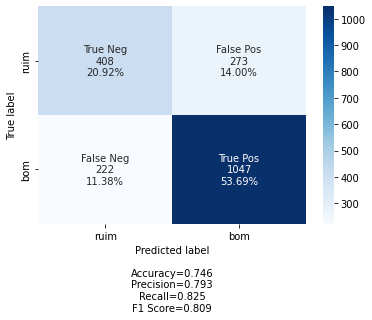

In [ ]:
X = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X)
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)


X_test_new = sm.add_constant(X_test)
y_hat = result_log.predict(X_test_new)
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

print('ROC AUC SCORE: ', metrics.roc_auc_score(y_test, y_pred))

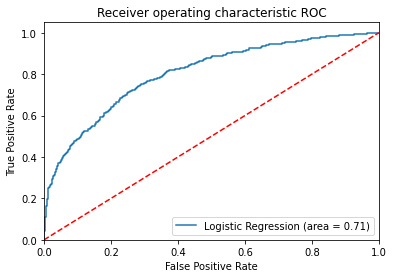

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem a variável chlorides**

Optimization terminated successfully.
         Current function value: 0.518849
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4535
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2154
Time:                        23:11:14   Log-Likelihood:                -2359.2
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                3.847e-271
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3512      0.186      7.246      0.000       0.986       1.717

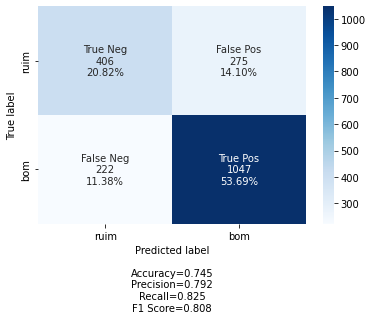

In [ ]:
# Retirando chlorides
features = ['const', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))




print('ROC AUC SCORE: ', metrics.roc_auc_score(y_test, y_pred))

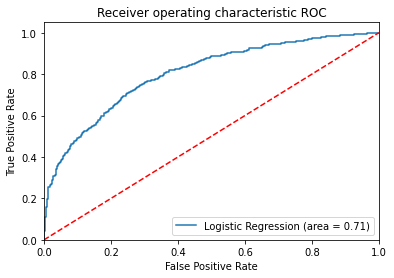

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem a variável pH**

Optimization terminated successfully.
         Current function value: 0.519345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4536
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2147
Time:                        23:11:47   Log-Likelihood:                -2361.5
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                3.102e-271
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2815      0.183      7.000      0.000       0.923       1.640

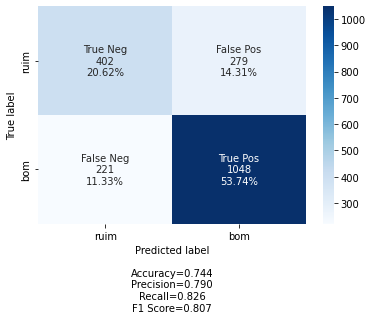

In [ ]:
# Retirando pH
features = ['const', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

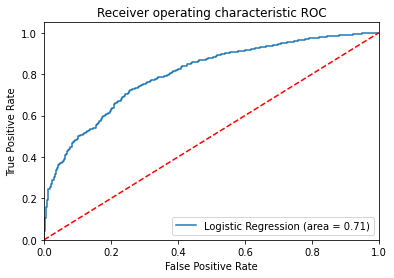

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem a variável fixed acidity**

Optimization terminated successfully.
         Current function value: 0.519445
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4537
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2145
Time:                        23:12:13   Log-Likelihood:                -2361.9
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                3.958e-272
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2507      0.180      6.937      0.000       0.897       1.604

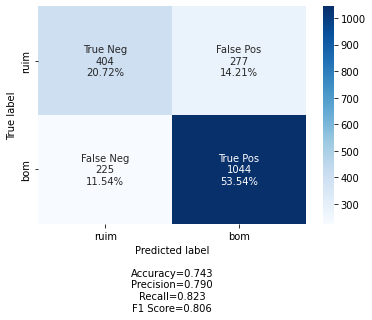

In [ ]:
# Retirando fixed acidity
features = ['const', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

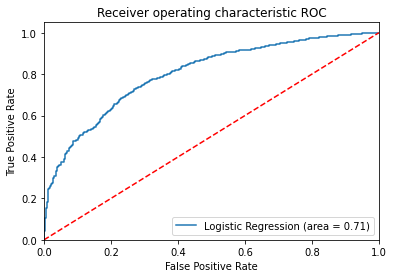

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem a variável citric acid**

Optimization terminated successfully.
         Current function value: 0.520068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4537
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2136
Time:                        23:12:39   Log-Likelihood:                -2364.7
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                6.603e-271
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3128      0.183      7.163      0.000       0.954       1.672

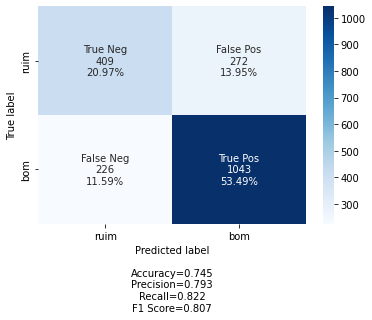

In [ ]:
# Retirando citric acid
features = ['const', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

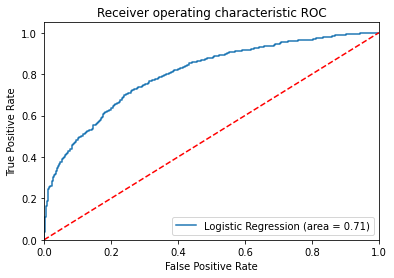

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem as variáveis citric acid e fixed acidity**

Optimization terminated successfully.
         Current function value: 0.520068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4538
Method:                           MLE   Df Model:                            8
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2136
Time:                        23:12:53   Log-Likelihood:                -2364.7
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                5.050e-272
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3115      0.179      7.328      0.000       0.961       1.662

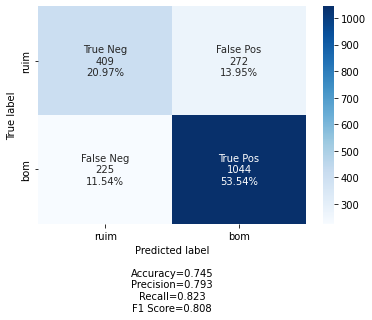

In [ ]:
# Retirando fixed acidity e citric acid
features = ['const', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

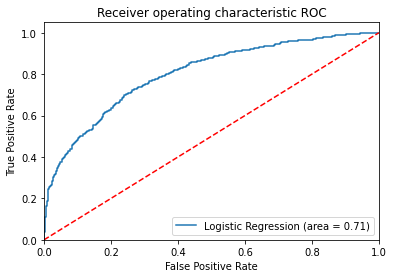

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

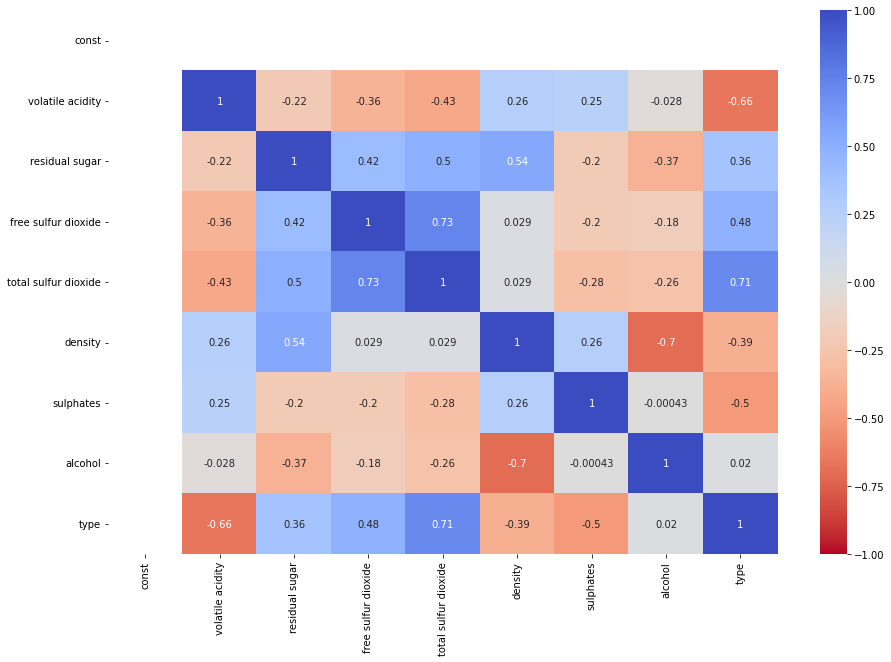

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(X[features].corr(), cmap="coolwarm_r", annot = True, vmin=-1, vmax=1)

##**Ajuste sem a variável free sulfur dioxide**

Optimization terminated successfully.
         Current function value: 0.521837
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4539
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2109
Time:                        23:13:18   Log-Likelihood:                -2372.8
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                1.084e-269
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4763      0.175      8.441      0.000       1.133       1.819

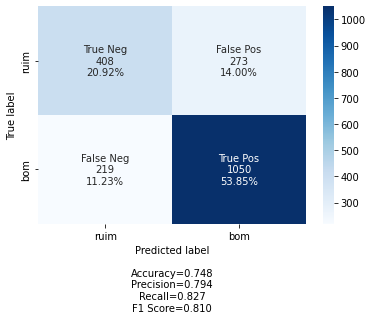

In [ ]:
# Retirando free sulfur dioxide
features = ['const', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

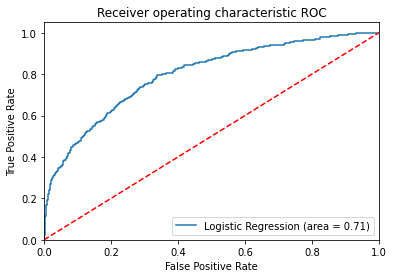

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem a variável total sulfur dioxide**

Optimization terminated successfully.
         Current function value: 0.521967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4539
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2107
Time:                        23:13:41   Log-Likelihood:                -2373.4
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                1.959e-269
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7133      0.152     11.245      0.000       1.415       2.012
vo

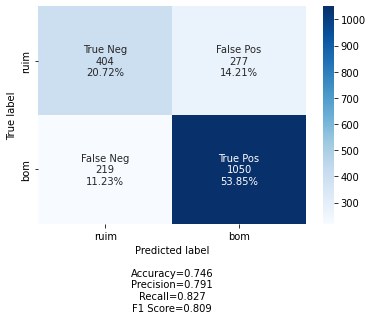

In [ ]:
# Retirando total sulfur dioxide
features = ['const', 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol', 'type', 'free sulfur dioxide']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

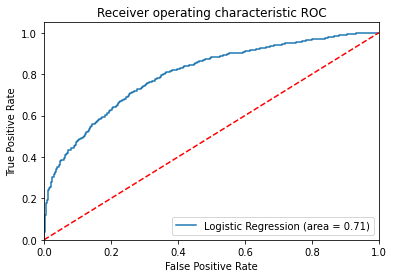

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

##**Ajuste sem as variáveis total e free sulfur dioxide**

Optimization terminated successfully.
         Current function value: 0.522351
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4540
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.2101
Time:                        23:14:11   Log-Likelihood:                -2375.1
converged:                       True   LL-Null:                       -3007.0
Covariance Type:            nonrobust   LLR p-value:                7.364e-270
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.6718      0.151     11.108      0.000       1.377       1.967
volatile ac

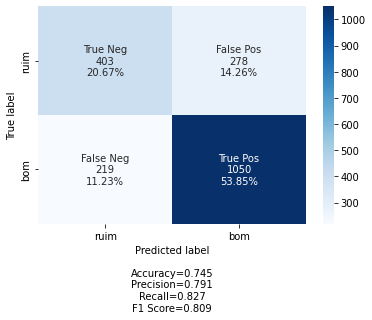

In [ ]:
# Retirando free sulfur dioxide
features = ['const', 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol', 'type']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

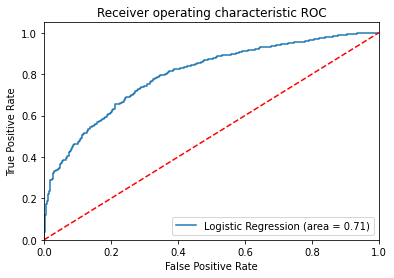

In [ ]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

Foram ajustados diversos modelos logísticos binários, sendo o primeiro um modelo completo e os subsequentes modelos com seleção de variáveis, onde o nivel de significância utilizado para testar a hipótese de significância estatística dos $\beta$ foi o de $\alpha=0.01$.
O modelo escolhido possui as seguintes features: volatile acidity, residual sugar, density, sulphates, alcohol e type.

O modelo escolhido possui o $pseudo-R^2$ de 21,01%, o que indica que, por mais que esse tipo de modelo seja mais adequado para esses dados, ele também não explica bem a variabilidade dos dados. Talvez sejam necessários coletar mais dados, mudar a função de ligação ou utilizar algum modelo de Machine Learning que seja capaz de classificar melhor os dados.

Apesar disso, as métricas do modelo mostram um desempenho melhor que o esperado: 
 + Acurácia: O modelo classificou corretamente 74,5% dos dados
 + Precisão: O modelo classificou corretamente 79,1% dos vinhos bons
 + Acurácia: Dentre todas as situações de classe "bom" como valor esperado,  modelo classificou corretamente 82,7% dos dados
 + F1-Score: Como o F1-Score encontrado foi de 80,9%, intui-se que o modelo mostrou um bom desempenho.  

Também foi feita a curva ROC e calculada a AUC, com o objetivo de verificar o equilíbrio entre a sensibilidade e especificidade do modelo e a capacitade de predizer corretamente, respectivamente. A AUC indica que o modelo prediz 71% dos dados corretamente e a curva ROC mostra que há um equilíbri razoável entre a sensibilidade e a especificidade. 


## **Conclusão**

O modelo linear não é adequado para modelar esse tipo de dado. Por isso, foi ajustado um modelo logístico. Apesar do baixo $pseudo-R^2$, a curva ROC e as métricas de avaliação do modelo apresentaram resultados satisfatórios, que poderia melhorar se as bases de vinho tinto e suave não fossem tão desbalanceadas, se houvessem mais dados ou até mesmo se fossem experimentadas outras funções de ligação adequadas. 

As variáveis dos modelos parcimoniosos para cada classe de modelo foram parecidas, a saber:

linear : features = 'fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol', 'type'

logístico: features = 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol', 'type'



# Análise com os tipos de vinhos separados



Como os modelos construídos a partir do dataset completo (com os dois tipos de vinho) se mostraram modelos ruins para explicar a variabilidade dos dados. Dado o exposto, optamos por apartar o dataset para a estimação de modelos separados para cada tipo de vinho, uma vez que foram observadas diferenças de correlação da qualidade com algumas variáveis independentes a depender se o vinho era tinto ou branco, conforme a análise exploratória dos dados.

##**Vinho Tinto**


In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

X = red_df[features]
Y = red_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

index_train = X_train.index
index_test = X_test.index

sc_X = StandardScaler()

X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=features, index=index_train)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=features, index=index_test)

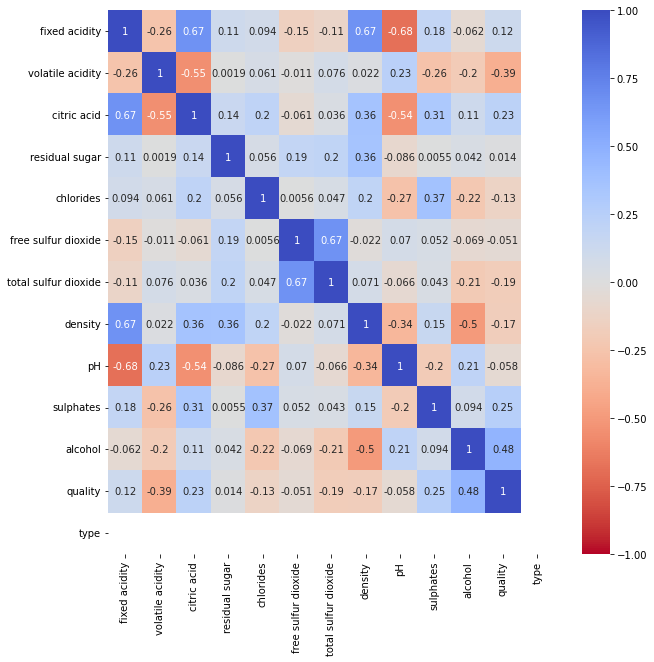

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(red_df.corr(), cmap="coolwarm_r", annot = True, vmin=-1, vmax=1)

###Regressão Linear

#### Ajustes

In [ ]:
metricas = pd.DataFrame()

In [ ]:
y = y_train
X = sm.add_constant(X_train)
est = sm.OLS(y, X).fit()

X_test_new = sm.add_constant(X_test)
y_pred = est.predict(sm.add_constant(X_test_new))

print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo1', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          8.34e-100
Time:                        00:12:43   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando residual sugar
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo2', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          1.12e-100
Time:                        00:12:47   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando density
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo3', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          1.40e-101
Time:                        00:12:50   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando 'fixed acidity'
features = ['const','volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo4', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          1.77e-102
Time:                        00:12:53   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando citric acid
features = ['const','volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo5', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          4.31e-103
Time:                        00:12:57   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando 'free sulfur dioxide'
features = ['const','volatile acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo6', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          3.43e-103
Time:                        00:13:02   Log-Likelihood:                -1106.8
No. Observations:                1119   AIC:                             2228.
Df Residuals:                    1112   BIC:                             2263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
#retirando pH
features = ['const','volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo7', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          3.01e-103
Time:                        00:13:06   Log-Likelihood:                -1109.2
No. Observations:                1119   AIC:                             2230.
Df Residuals:                    1113   BIC:                             2260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6220 

In [ ]:
metricas

,0,0,0,0,0,0,0
0,modelo1,modelo2,modelo3,modelo4,modelo5,modelo6,modelo7
1,0.354851,0.355326,0.355829,0.356237,0.355795,0.353881,0.35174
2,2230.95,2229.13,2227.27,2225.57,2225.34,2227.67,2230.38
3,0.411235,0.411785,0.41167,0.411759,0.410907,0.411971,0.419065


#### Validação

Apesar do modelo7 não possuir os melhores $R^2-ajustado$, AIC e EQM, ele é o único que possui todos os $\beta$ significativos. 

Portanto, pelo princípio da parcimônia, esse foi o modelo escolhido.

O referido modelo explica 35,175% da variabilidade dos dados. Segue abaixo a validação dos pressupostos do modelo.

In [ ]:
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

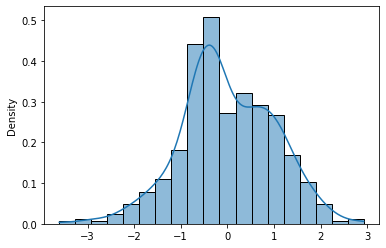

In [ ]:
sns.histplot(std_residuals, kde = True, stat = "density")

De acordo com o histograma, verifica-se que os resíduos se distribuem dentro do intervalo [-3,3]. Entretanto, a distribuição possui leve assimetria à esquerda, o que já viola a hipótese de normalidade. 
Apenas esse fato já é o suficiente para concluir que o modelo linear não é adequado para modelar esses dados, mas seguiremos com a análise da variância.

((array([-2.97962347e+00, -2.69660220e+00, -2.53737920e+00, -2.42443823e+00,
         -2.33591654e+00, -2.26262051e+00, -2.19977879e+00, -2.14458436e+00,
         -2.09524077e+00, -2.05052635e+00, -2.00957116e+00, -1.97173298e+00,
         -1.93652366e+00, -1.90356318e+00, -1.87254966e+00, -1.84323916e+00,
         -1.81543166e+00, -1.78896098e+00, -1.76368753e+00, -1.73949289e+00,
         -1.71627565e+00, -1.69394832e+00, -1.67243485e+00, -1.65166871e+00,
         -1.63159133e+00, -1.61215090e+00, -1.59330134e+00, -1.57500146e+00,
         -1.55721433e+00, -1.53990665e+00, -1.52304835e+00, -1.50661212e+00,
         -1.49057310e+00, -1.47490862e+00, -1.45959792e+00, -1.44462192e+00,
         -1.42996309e+00, -1.41560525e+00, -1.40153344e+00, -1.38773381e+00,
         -1.37419351e+00, -1.36090056e+00, -1.34784383e+00, -1.33501292e+00,
         -1.32239811e+00, -1.30999029e+00, -1.29778094e+00, -1.28576204e+00,
         -1.27392606e+00, -1.26226590e+00, -1.25077488e+00, -1.23944668e+00,

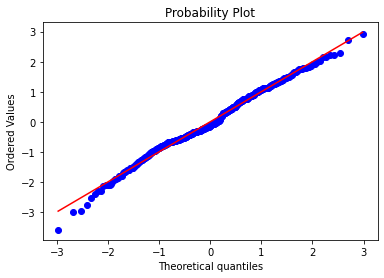

In [ ]:
fig,ax = plt.subplots()
probplot(std_residuals, plot = ax, fit=True)

Text(0, 0.5, 'Resíduos')

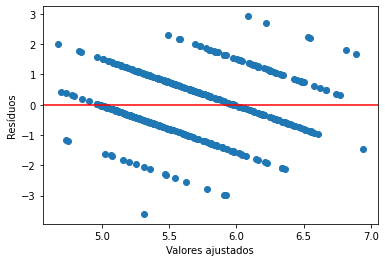

In [ ]:
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')

O gráfico de Valores ajustados x Resíduos evidencia que a hipótese de homoescedasticidade dos resíduos foi violada, uma vez que fica claro a presença de uma tendência decrescente.

#### Conclusão

Como o modelo linear não se mostrou capaz de modelar esses dados, será feita a regressão logística.

###Regressão Logística

In [ ]:
y_train = y_train.apply(lambda v: 0 if v < 6 else 1)
y_test = y_test.apply(lambda v: 0 if v < 6 else 1)

In [ ]:
metricas = pd.DataFrame()

Optimization terminated successfully.
         Current function value: 0.509343
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1107
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2638
Time:                        00:42:58   Log-Likelihood:                -569.96
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 9.835e-81
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1871      0.075      2.485      0.013       0.040       0.335

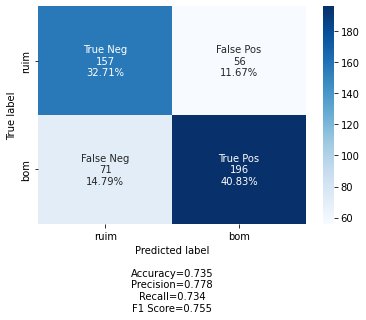

In [ ]:
X = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X)
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

X_test_new = sm.add_constant(X_test)
y_hat = result_log.predict(X_test_new)
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

metricas = pd.concat([metricas, pd.Series(['modelo1',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.509360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1108
Method:                           MLE   Df Model:                           10
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2638
Time:                        00:43:22   Log-Likelihood:                -569.97
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 1.526e-81
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1870      0.075      2.484      0.013       0.039       0.335

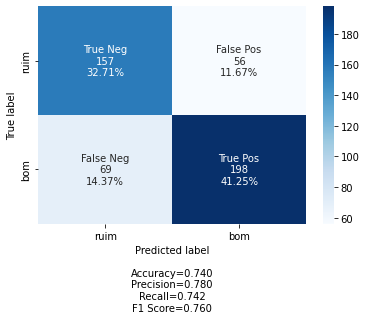

In [ ]:
# Retirando pH
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))

metricas = pd.concat([metricas, pd.Series(['modelo2',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.509381
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1109
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2637
Time:                        00:44:22   Log-Likelihood:                -570.00
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 2.247e-82
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1866      0.075      2.479      0.013       0.039       0.334

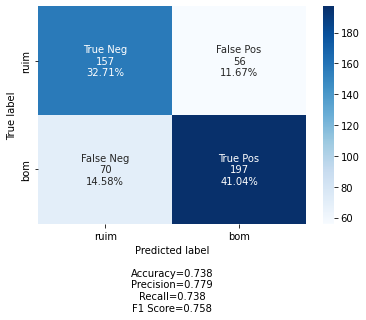

In [ ]:
# Retirando residual sugar
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo3',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.509462
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1110
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2636
Time:                        00:45:47   Log-Likelihood:                -570.09
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 3.326e-83
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1838      0.075      2.452      0.014       0.037       0.331

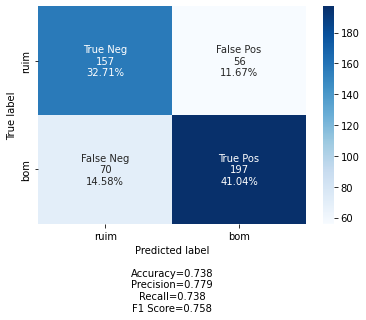

In [ ]:
# Retirando density
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo4',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.510436
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1111
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2622
Time:                        00:46:04   Log-Likelihood:                -571.18
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 1.230e-83
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1829      0.075      2.442      0.015       0.036       0.330

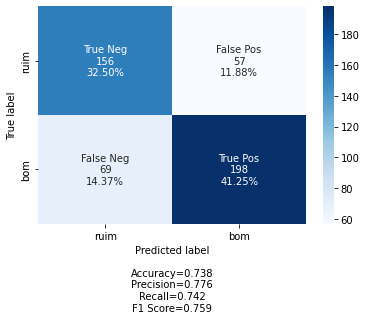

In [ ]:
# Retirando chlorides
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo5',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.511982
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1112
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2600
Time:                        00:46:21   Log-Likelihood:                -572.91
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 7.939e-84
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1846      0.075      2.468      0.014       0.038       0.331

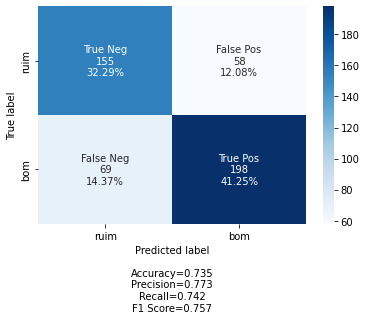

In [ ]:
# Retirando 'fixed acidity'
features = ['const','volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo6',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.513701
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2575
Time:                        00:46:46   Log-Likelihood:                -574.83
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 5.664e-84
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1906      0.075      2.555      0.011       0.044       0.337

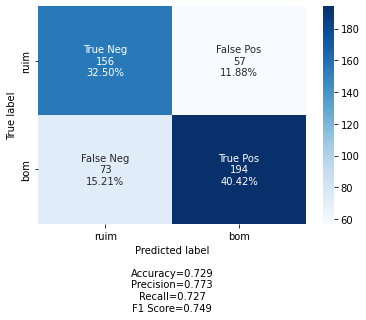

In [ ]:
# Retirando citric acid
features = ['const','volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo7',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

In [ ]:
metricas

,0,0,0,0,0,0,0
0,modelo1,modelo2,modelo3,modelo4,modelo5,modelo6,modelo7
1,0.263795,0.26377,0.26374,0.263623,0.262216,0.25998,0.257496
2,1163.91,1161.95,1159.99,1158.18,1158.35,1159.82,1161.66
3,0.735417,0.739583,0.7375,0.7375,0.7375,0.735417,0.729167
4,0.755299,0.760077,0.757692,0.757692,0.758621,0.75717,0.749035
5,0.777778,0.779528,0.778656,0.778656,0.776471,0.773438,0.772908
6,0.734082,0.741573,0.737828,0.737828,0.741573,0.741573,0.726592
7,0.735586,0.739331,0.737458,0.737458,0.736984,0.734636,0.729493


Apesar do modelo7 apresentar o AIC ligeiramente maior que outros modelos e métricas de avaliação um pouco menores que os demais modelos, essas diferenças são insignificantes quando comparadas ao princípio da parcimônia. Além disso, o modelo 7 é o único onde todos os $\beta$ são estatisticamente significativos ao nível de significância $\alpha=0,01$. 

Portanto, esse é o modelo mais adequado dentre os ajustados. 

O modelo escolhido possui o  pseudo−R2  de 25,74%, o que indica que, por mais que esse tipo de modelo seja mais adequado para esses dados, ele também não explica bem a variabilidade dos dados. Talvez sejam necessários coletar mais dados, mudar a função de ligação ou utilizar algum modelo de Machine Learning que seja capaz de classificar melhor os dados.

Apesar disso, as métricas do modelo mostram um desempenho melhor que o esperado:

Acurácia: O modelo classificou corretamente 72,91% dos dados
Precisão: O modelo classificou corretamente 77,29% dos vinhos bons
Acurácia: Dentre todas as situações de classe "bom" como valor esperado, modelo classificou corretamente 72,66% dos dados
F1-Score: Como o F1-Score encontrado foi de 74,9%, intui-se que o modelo mostrou um bom desempenho.
A AUC indica que o modelo prediz 72,05% dos dados corretamente.

##**Vinho Branco**

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

X = white_df[features]
Y = white_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

index_train = X_train.index
index_test = X_test.index

sc_X = StandardScaler()

X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=features, index=index_train)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=features, index=index_test)

### Regressão Linear

#### Ajustes

In [ ]:
metricas = pd.DataFrame()

In [ ]:
y = y_train
X = sm.add_constant(X_train)
est = sm.OLS(y, X).fit()

X_test_new = sm.add_constant(X_test)
y_pred = est.predict(sm.add_constant(X_test_new))

print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo1', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          8.20e-241
Time:                        01:20:45   Log-Likelihood:                -3895.2
No. Observations:                3428   AIC:                             7814.
Df Residuals:                    3416   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8690 

In [ ]:
#retirando total sulfur dioxide
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo2', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          7.31e-242
Time:                        01:20:47   Log-Likelihood:                -3895.3
No. Observations:                3428   AIC:                             7813.
Df Residuals:                    3417   BIC:                             7880.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8690    

In [ ]:
#retirando chlorides
features = ['const','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo3', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          6.31e-243
Time:                        01:20:50   Log-Likelihood:                -3895.4
No. Observations:                3428   AIC:                             7811.
Df Residuals:                    3418   BIC:                             7872.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8690    

In [ ]:
#retirando citric acid
features = ['const','fixed acidity', 'volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo4', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          6.02e-244
Time:                        01:20:54   Log-Likelihood:                -3895.7
No. Observations:                3428   AIC:                             7809.
Df Residuals:                    3419   BIC:                             7865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8690    

In [ ]:
#retirando fixed acidity
features = ['const','volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

est = sm.OLS(y, X[features]).fit()
y_pred = est.predict(X_test_new[features])
print(est.summary())

metricas = pd.concat([metricas,pd.Series(['modelo5', est.rsquared_adj, est.aic,metrics.mean_squared_error(y_test,y_pred)])],axis=1)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          3.16e-244
Time:                        01:21:00   Log-Likelihood:                -3897.7
No. Observations:                3428   AIC:                             7811.
Df Residuals:                    3420   BIC:                             7861.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8690    

In [ ]:
metricas

,0,0,0,0,0
0,modelo1,modelo2,modelo3,modelo4,modelo5
1,0.284274,0.284454,0.284624,0.284727,0.284083
2,7814.47,7812.61,7810.8,7809.31,7811.39
3,0.554293,0.554446,0.554076,0.553493,0.555775


A diferença entre as métricas de seleção do modelo são praticamente inexistentes, o que corrobora com a decisão de optar por seguir com o modelo5, que é o modelo que considera apenas as variáveis associadas aos $\beta$ significativos ao nível de significância $\alpha=0,01$.   

#### Validação

In [ ]:
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

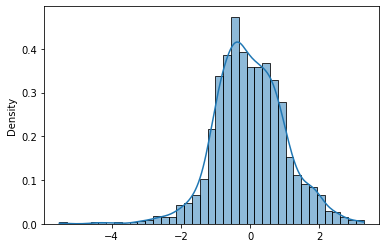

In [ ]:
sns.histplot(std_residuals, kde = True, stat = "density")

O histograma dos resíduos do vinho branco se aproxima bastante ao histograma da base com os dois tipos de vinho. Tal fato já era esperado, uma vez que as amostras são desbalanceadas, com mais dados de vinho branco. 

O intervalo de variação dos resíduos foge ao esperado, pois a distribuição possui assimetria à esquerda. Ao observar a assimetria, há um forte indicativo da volação do pressuposto de normalidade dos resíduos. 

((array([-3.30705164, -3.04998245, -2.90703241, ...,  2.90703241,
          3.04998245,  3.30705164]),
  array([-5.51041307, -4.38676693, -4.34019952, ...,  3.06115345,
          3.15960593,  3.28405927])),
 (0.9946098924934796, 7.608740468668606e-17, 0.9929777735971498))

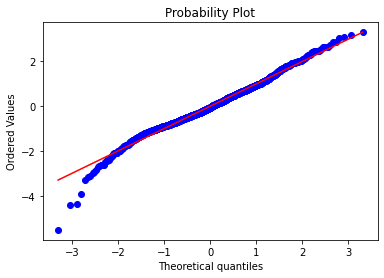

In [ ]:
fig,ax = plt.subplots()
probplot(std_residuals, plot = ax, fit=True)

O Q-Q Plot corrobora a análise feita no histograma dos resíduos, evidenciando um afastamento da cauda esquerda dos quantis amostrais da reta dos quantis teóricos da Normal padrão.

Dito isso, entende-se a violação do pressuposto de normalidade e, por consequ~encia, a inadequação do modelo linear para modelar esses dados. 

Text(0, 0.5, 'Resíduos')

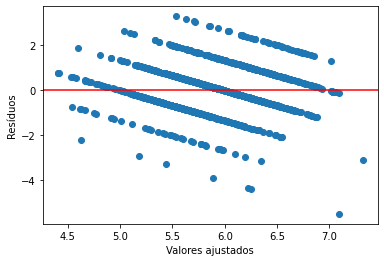

In [ ]:
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')

Além da violação do pressuposto de normalidade, claramente há violação do pressuposto de homoscedasticidade, uma vez que o gráfico dos Valores Ajustados X Resíduos evidencia uma tendência decrescente, mostrando que o modelo não foi capaz de capturar a variabilidade dos dados. 

#### Conclusão

Conforme já observado nas análises anteriores, o modelo linear não é adequado para modelar esses dados. Dessa forma, seguimos com a modelagem logística.

### Regressão Logística

In [ ]:
y_train = y_train.apply(lambda v: 0 if v < 6 else 1)
y_test = y_test.apply(lambda v: 0 if v < 6 else 1)

In [ ]:
metricas = pd.DataFrame()

Optimization terminated successfully.
         Current function value: 0.504667
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3416
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2131
Time:                        01:27:18   Log-Likelihood:                -1730.0
converged:                       True   LL-Null:                       -2198.4
Covariance Type:            nonrobust   LLR p-value:                7.206e-194
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8958      0.045     19.779      0.000       0.807       0.985

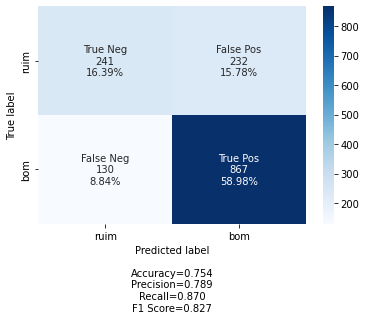

In [ ]:
X = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X)
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

X_test_new = sm.add_constant(X_test)
y_hat = result_log.predict(X_test_new)
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo1',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.504668
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3417
Method:                           MLE   Df Model:                           10
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2131
Time:                        01:31:23   Log-Likelihood:                -1730.0
converged:                       True   LL-Null:                       -2198.4
Covariance Type:            nonrobust   LLR p-value:                7.267e-195
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8958      0.045     19.783      0.000       0.807       0.985

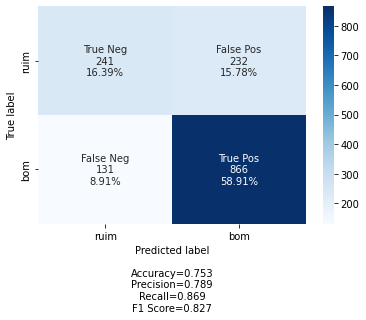

In [ ]:
# Retirando citric acid
features = ['const','fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo2',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.504735
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2130
Time:                        01:32:34   Log-Likelihood:                -1730.2
converged:                       True   LL-Null:                       -2198.4
Covariance Type:            nonrobust   LLR p-value:                8.710e-196
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8948      0.045     19.780      0.000       0.806       0.983

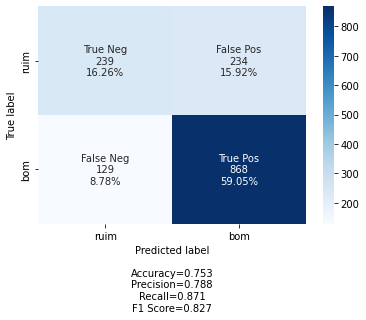

In [ ]:
# Retirando fixed acidity
features = ['const', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo3',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.504852
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3419
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2128
Time:                        01:33:16   Log-Likelihood:                -1730.6
converged:                       True   LL-Null:                       -2198.4
Covariance Type:            nonrobust   LLR p-value:                1.160e-196
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8944      0.045     19.774      0.000       0.806       0.983
vo

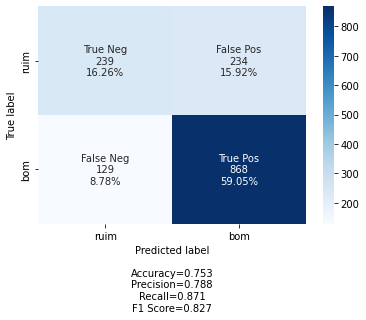

In [ ]:
# Retirando total sulfur dioxide
features = ['const', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo4',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

Optimization terminated successfully.
         Current function value: 0.505111
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3420
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2124
Time:                        01:33:50   Log-Likelihood:                -1731.5
converged:                       True   LL-Null:                       -2198.4
Covariance Type:            nonrobust   LLR p-value:                2.337e-197
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8922      0.045     19.759      0.000       0.804       0.981
vo

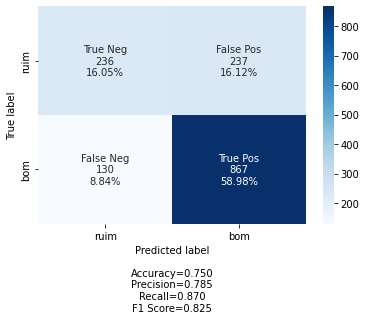

In [ ]:
# Retirando chlorides
features = ['const', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

log_reg = sm.Logit(y_train, X[features])
result_log = log_reg.fit()
print(result_log.summary())
print('AIC: ',result_log.aic)

y_hat = result_log.predict(X_test_new[features])
y_pred = list(map(round, y_hat))

cm = metrics.confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cm))
print(metrics.classification_report(y_test, y_pred))
metricas = pd.concat([metricas, pd.Series(['modelo5',result_log.prsquared,result_log.aic,metrics.accuracy_score(y_test, y_pred),metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.roc_auc_score(y_test, y_pred)])],axis=1)

In [ ]:
metricas

,0,0,0,0,0
0,modelo1,modelo2,modelo3,modelo4,modelo5
1,0.213082,0.213082,0.212976,0.212794,0.212391
2,3484,3482,3480.47,3479.27,3479.04
3,0.753741,0.753061,0.753061,0.753061,0.75034
4,0.82729,0.82673,0.827061,0.827061,0.825321
5,0.788899,0.788707,0.787659,0.787659,0.785326
6,0.869609,0.868606,0.870612,0.870612,0.869609
7,0.689561,0.68906,0.687949,0.687949,0.684276


Observa-se que não há grandes diferenças entre as métricas de avaliação dos modelos ajustados. Sendo assim, pelo princípio da parcimônia o modelo considerado é o modelo5, que possui apenas variáveis que os $\beta$ associados foram considerados estatisticamente significativos. 

O modelo escolhido possui o pseudo−R2 de 21,24%, o que indica que, por mais que esse tipo de modelo seja mais adequado para esses dados, ele também não explica bem a variabilidade dos dados. Talvez sejam necessários coletar mais dados, mudar a função de ligação ou utilizar algum modelo de Machine Learning que seja capaz de classificar melhor os dados.

Apesar disso, as métricas do modelo mostram um desempenho melhor que o esperado:

+ Acurácia: O modelo classificou corretamente 75,04% dos dados 
+ Precisão: O modelo classificou corretamente 78,53% dos vinhos bons 
+ Recall: Dentre todas as situações de classe "bom" como valor esperado, modelo classificou corretamente 86,96% dos dados 
+ F1-Score: Como o F1-Score encontrado foi de 82,53%, intui-se que o modelo mostrou um bom desempenho. 

A AUC indica que o modelo prediz 68,43% dos dados corretamente.

# **Conclusão final**

+ Os modelos lineares violaram os pressupostos mesmo quando serapamos os vinhos
+ Os modelos logísticos forneceram melhores resultados. Entratanto, os resultados ainda poderiam ser melhorados com outros tipos de modelos para classificação (de ML), mudanças na função de ligação, aumento de amostra ou até mesmo com interaçoes entre as variáveis. 
+ O uso da base apartada produziu melhores resultados do que a base com os dois tipos de vinho. Isso pode ser refleto do tamanho da base, da qualidade dos dados e das características que influenciam na qualidade de cada tipo de vinho.
